In [123]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from imp import reload
import torch.nn as nn

import sys
sys.path.append("..")
import vnn
import vec_models
reload(vnn)

<module 'vnn' from '../vnn.py'>

torch.Size([1, 2000])


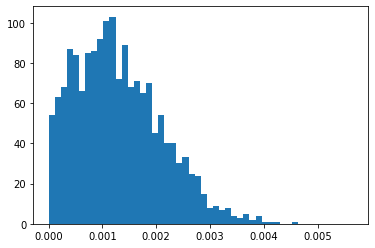

torch.Size([1, 2000])


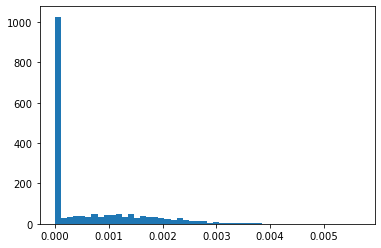

torch.Size([1, 2000])


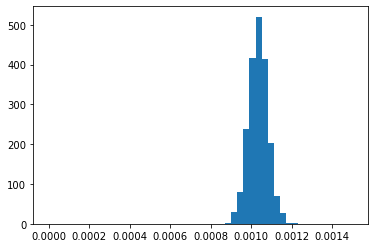

torch.Size([1, 2000])


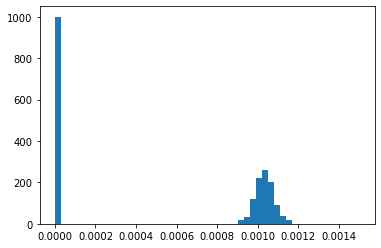

torch.Size([1, 2000])


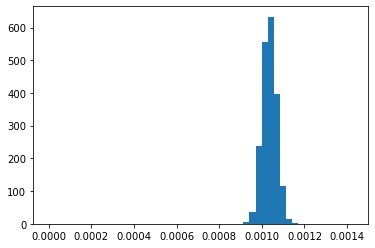

torch.Size([1, 2000])


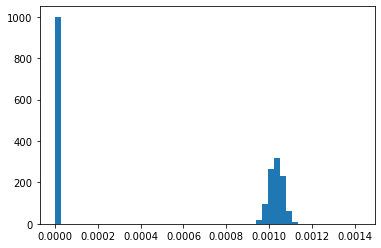

torch.Size([1, 2000])


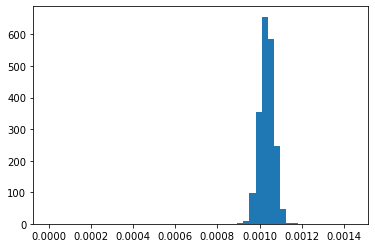

torch.Size([1, 2000])


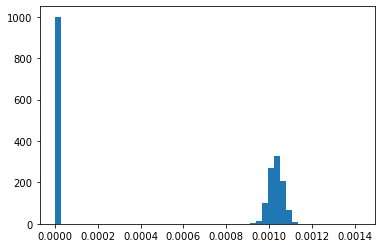

torch.Size([1, 2000])


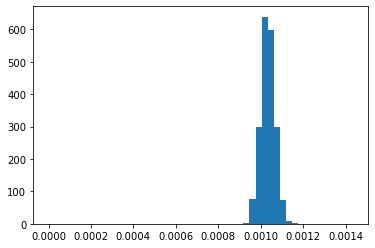

torch.Size([1, 2000])


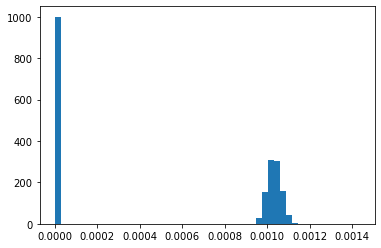

torch.Size([1, 2000])


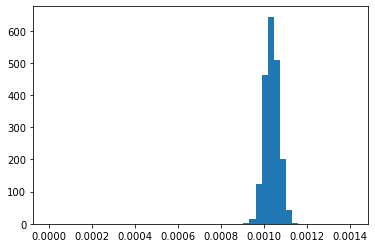

torch.Size([1, 2000])


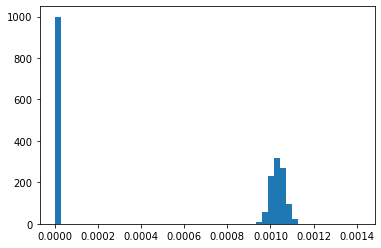

torch.Size([1, 2000])


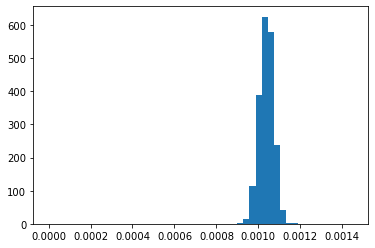

torch.Size([1, 2000])


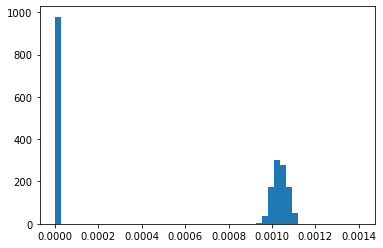

torch.Size([1, 2000])


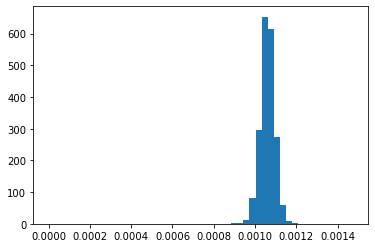

In [150]:
fc1 = vnn.Linear(2, 2000, 2000)
fc2 = vnn.Linear(2, 2000, 2000)
fc3 = vnn.Linear(2, 2000, 2000)
fc4 = vnn.Linear(2, 2000, 2000)
fc5 = vnn.Linear(2, 2000, 2000)
fc6 = vnn.Linear(2, 2000, 2000)
fc7 = vnn.Linear(2, 2000, 2000)
fc8 = vnn.Linear(2, 2000, 1)

with torch.no_grad():
    for layer in (fc1, fc2, fc3, fc4, fc5, fc6, fc7, fc8):
        layer.weight.normal_(2/2000, 2/2000)
        layer.bias[:] = 0.
    
model = nn.Sequential(
    fc1, vnn.tReLU(2, 2000),
    fc2, vnn.tReLU(2, 2000),
    fc3, vnn.tReLU(2, 2000),
    fc4, vnn.tReLU(2, 2000),
    fc5, vnn.tReLU(2, 2000),
    fc6, vnn.tReLU(2, 2000),
    fc7, vnn.tReLU(2, 2000),
    fc8)

input = torch.randn(1, 2, 2000)
input -= input.mean(dim=2, keepdim=True)
output = model(input)[..., 0]
output_error = torch.randn(1, 2)

g = torch.ones(1, 1)
for i in list(range(len(model)))[::-1]:
    layer = model[i]
    g = layer.custom_backward(g, output_error)
    print(g.shape)
    vals = g.numpy().flatten()
    plt.hist(vals, range=(0, np.max(vals)*1.25), bins=50)
    plt.show()


In [143]:
data = torch.load('trained_models/epoch_0.pt', map_location=torch.device('cpu'))
state_dict = data['model_state_dict']
model = vec_models.make_cifar_vec_conv(True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [144]:
input = torch.randn(32, 10, 30, 32, 32)
labels = torch.randint(0, 10, (len(input),))
output = model(input)[..., 0]

vnn.zero_grads(model)
vnn.set_model_grads(model, output, labels, learning_rule="bp")
grads_bp = [param.grad for param in model.parameters()]

vnn.zero_grads(model)
vnn.set_model_grads(model, output, labels, learning_rule="df")
grads_df = [param.grad for param in model.parameters()]

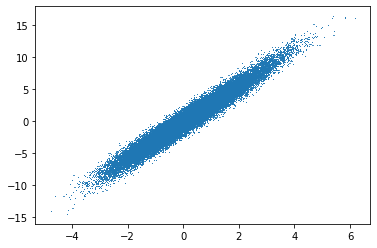

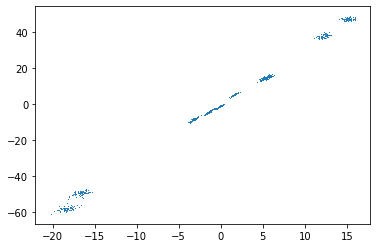

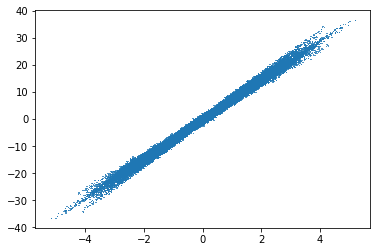

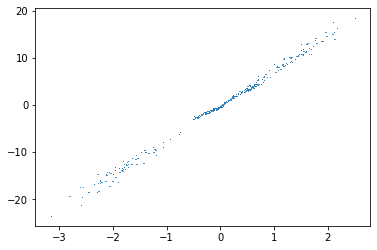

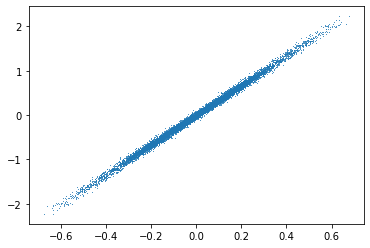

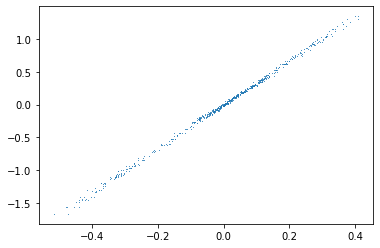

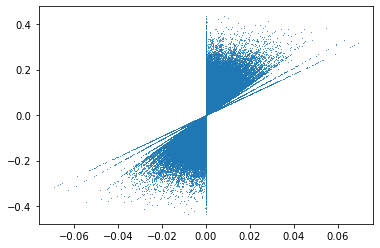

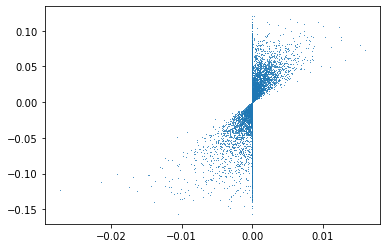

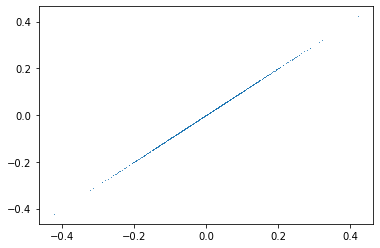

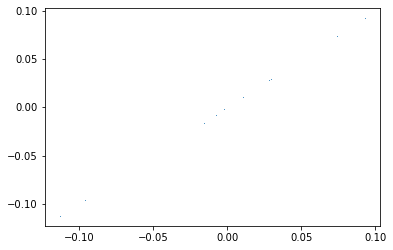

In [145]:
for i in range(len(grads_bp)):
    if grads_bp[i] is None:
        continue
    g1 = grads_bp[i].numpy().flatten()
    g2 = grads_df[i].numpy().flatten()
    plt.scatter(g1, g2, lw=0, s=1)
    plt.show()